# **Question 1: Descriptive analysis of the additives**

**Import the dataset**

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/SaranyaRavikumar06/Datasets/main/ingredient.csv")

**Data Exploration**

In [ ]:
#Display the top 10 rows in the dataset
df.head(10)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


In [ ]:
#Display the column names in the dataset
df.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], dtype='object')

In [ ]:
#Display the detailed information about the dataset like(total no of rows and columns and the datatype of each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [ ]:
#Display the total number of rows and columns in a dataset
df.shape

(214, 9)

In [ ]:
#Check whether there is any null value in each column in a dataset
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

In [ ]:
#Describe the statistical analysis for the quantitative data columns in the dataset 
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
#Display the correlation of the dataset
df.corr()

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


**Statistical Testing**

**Null Hypothesis(H0)**=> Formulations of Petrol are not significantly different with different characteristics.(if **p-value>0.05 **then accept the null hypothesis)


**Alternate Hypothesis(H1)**=>Formulations of Petrol are  significantly different.(if **p-value=0.000 or p-value<0.05 **then reject the null hypothesis)

In [ ]:
# reshape the df dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['a', 'b', 'c', 'd','e','f','g','h','i'])
# Change the column names for the reshaped dataset
df_melt.columns = ['Index', 'Additives', 'Value']

In [ ]:
df_melt

,Index,Additives,Value
0,0,a,1.51735
1,1,a,1.53125
2,2,a,1.52300
3,3,a,1.51768
4,4,a,1.51813
...,...,...,...
1921,209,i,0.16000
1922,210,i,0.32000
1923,211,i,0.00000
1924,212,i,0.22000


**Analysis of variance (ANOVA) uses F-tests to statistically assess the equality of means when you have three or more groups.**



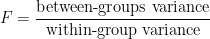

In [ ]:
#Apply F-test to find the fvalue and p-value
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['a'], df['b'], df['c'], df['d'],df['e'],df['f'],df['g'],df['h'],df['i'])
print(fvalue)
print(pvalue)


The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples. The higher the F-value, the lower the corresponding p-value.

**The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among formulation**.

Here, there are 9 additives(a, b, c,d,e,f,g,h and i), which are groups for ANOVA analysis.
Additives are independent variable and termed as factor. As there are nine types of additives,additive factor has nine levels.

In [ ]:
#Print the HYpothesis result based on p-value
if pvalue<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [ ]:
# get ANOVA table
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Value ~ C(Additives)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
#Display pairwise results of the anova test
pair_t = model.t_test_pairwise('C(Additives)')
pair_t.result_frame

Thus,we have made data exploaration and analysed data using hypothesis testing

# **Question 2: Graphical analysis of the additives**

**Data Visulaization**

In [ ]:
#Visualize the datset by  basic line plot
import matplotlib.pyplot as plt
df.plot( y=['a', 'b','c','d','e','f','g','h','i'], subplots=True, layout=(4,4), figsize=(20,15))
plt.show()

In [ ]:
#Plot the histogram in order to visualize the distribution of data
df.hist(bins=15,layout=(4,4), figsize=(20,15))
plt.show()

In [ ]:
#To plot multiple pairwise bivariate distributions in a dataset, we can use the pairplot() function.
import seaborn as sns
sns.pairplot(df)

In [ ]:
#Boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell us about the outliers and what their values are.
df.boxplot(figsize=(20,15))

In [ ]:
#Heatmap to display the correlation plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True) 
plt.gcf().set_size_inches(20, 10)

**Handle Outliers**

In [ ]:
#Z-score indicates how much a given value differs from the standard deviation
import scipy.stats as stats
zscores = stats.zscore(df)
zscores

In [ ]:
#There are different methods to treat an outlier, z-score being the simple one.
#Here we make the absolute values of z score so that the negative values or treated as positive
import numpy as np
abs_z_scores = np.abs(zscores)
abs_z_scores

It is common to use -3 and +3 as threshold. Any data point with a z-score below -3 or above +3 are treated as outliers. The reason for this common threshold is that 99.7% of the values in a standard normal distribution fall between -3 and +3.

In [ ]:
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [ ]:
#After filtering the outliers by using the zscore 
#Shapeof new dataframe
new_df.shape

(194, 9)

Thus, we have visualised our data and handled outlierseffevtively using z score

# **Question 3:Machine Learning Model: Clustering**

**Feature Scaling on the ingredients.csv data**

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

In [ ]:
#Scaling the  original dataset(df) data

from sklearn.preprocessing import StandardScaler
sc_df = StandardScaler()
df_std = sc_df.fit_transform(df)

**Handle Outliers**

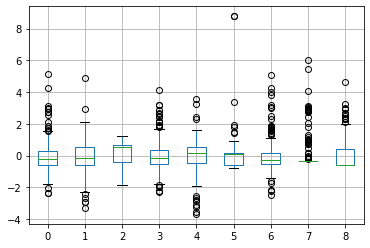

In [ ]:
df_std1=pd.DataFrame(df_std)
df_std1.boxplot()

**Z Score**

In [ ]:
import scipy.stats as stats
zscores = stats.zscore(df_std1)
zscores

array([[-3.35148849e-01, -4.76069257e-01,  5.94473387e-01, ...,
        -3.64103189e-01, -3.52876828e-01,  1.33633894e-01],
       [ 4.25267336e+00, -3.28694275e+00, -1.86551055e+00, ...,
         3.05885515e+00,  5.99721046e+00,  2.29388828e+00],
       [ 1.52968536e+00, -1.20107111e-01,  6.22269816e-01, ...,
         8.54357288e-01, -3.52876828e-01, -2.77843132e-01],
       ...,
       [-1.73419864e-01, -8.93404187e-01,  6.84811780e-01, ...,
        -1.80981961e-01, -3.52876828e-01, -5.86450902e-01],
       [ 1.47138519e-02, -5.86540268e-01,  7.33455531e-01, ...,
         2.13926668e-03, -3.52876828e-01,  1.67667274e+00],
       [-1.70159374e+00, -5.00618371e-01, -1.86551055e+00, ...,
        -1.42761494e+00, -3.52876828e-01, -5.86450902e-01]])

In [ ]:
import numpy as np
abs_z_scores = np.abs(zscores)
abs_z_scores

array([[3.35148849e-01, 4.76069257e-01, 5.94473387e-01, ...,
        3.64103189e-01, 3.52876828e-01, 1.33633894e-01],
       [4.25267336e+00, 3.28694275e+00, 1.86551055e+00, ...,
        3.05885515e+00, 5.99721046e+00, 2.29388828e+00],
       [1.52968536e+00, 1.20107111e-01, 6.22269816e-01, ...,
        8.54357288e-01, 3.52876828e-01, 2.77843132e-01],
       ...,
       [1.73419864e-01, 8.93404187e-01, 6.84811780e-01, ...,
        1.80981961e-01, 3.52876828e-01, 5.86450902e-01],
       [1.47138519e-02, 5.86540268e-01, 7.33455531e-01, ...,
        2.13926668e-03, 3.52876828e-01, 1.67667274e+00],
       [1.70159374e+00, 5.00618371e-01, 1.86551055e+00, ...,
        1.42761494e+00, 3.52876828e-01, 5.86450902e-01]])

In [ ]:
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_std1[filtered_entries]

In [ ]:
new_df.shape

(194, 9)

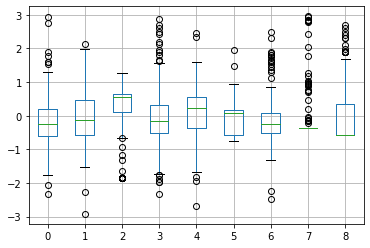

In [ ]:
new_df.boxplot()

We still have outliers despite after applying z score also.
This is because it is NOT acceptable to drop an observation just because it is an outlier, sometimes they can be legitimate observations and  sometimes the most interesting ones.  It’s important to investigate the nature of the outlier before deciding to drop them.
**So here we proceed the machine learning model with the outliers**

**Elbow method - To find the K Value**

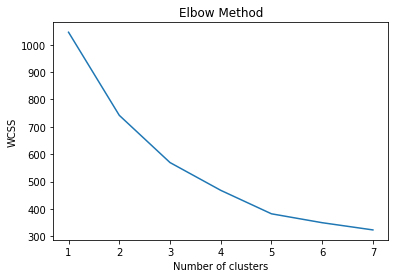

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**We select cluster size as 3 from the elbow method**

**K-Means Clustering**

In [ ]:
#Apply the model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(new_df)


In [ ]:
pred_y

In [ ]:
len(pred_y)

194

In [ ]:
new_df['predictions'] = pd.DataFrame(pred_y)
new_df.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,predictions
0,-0.335149,-0.476069,0.594473,0.492055,0.102319,0.066000,-0.364103,-0.352877,0.133634,0.0
2,1.529685,-0.120107,0.622270,-1.254576,-0.855320,-0.579492,0.854357,-0.352877,-0.277843,0.0
3,-0.226229,-1.040699,0.580575,-0.029927,0.645844,0.112107,-0.293672,-0.352877,-0.586451,0.0
4,-0.077703,0.027188,0.900234,-0.531832,-0.208266,0.127475,-0.568354,-0.352877,-0.586451,0.0
5,-0.381357,-0.660188,0.552779,-0.230689,0.503492,0.096738,-0.371146,-0.352877,-0.586451,0.0
6,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150,0.0
8,-0.295542,-0.697011,0.566677,-0.612137,0.801137,0.096738,-0.286629,-0.352877,-0.586451,0.0
9,0.938879,0.763661,0.747354,-1.736405,-1.114141,-0.594861,0.488115,-0.352877,-0.586451,0.0
10,-0.331848,-0.770659,0.650066,-0.310994,0.179965,0.142844,-0.180982,-0.352877,-0.586451,2.0
11,-0.648705,-1.052973,0.552779,0.853427,0.749372,0.204320,-0.617656,-0.352877,0.339372,0.0


## Visualisation of Cluster 

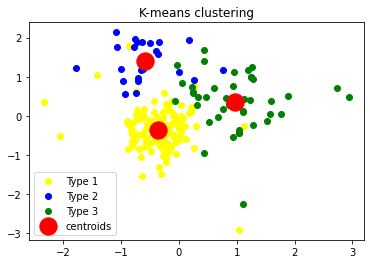

In [ ]:
#Lets visualize the clusters and their centroids together
plt.scatter(new_df.iloc[pred_y == 0, 0], new_df.iloc[pred_y == 0, 1], c = 'yellow', label = 'Type 1')
plt.scatter(new_df.iloc[pred_y == 1, 0], new_df.iloc[pred_y == 1, 1], c = 'blue', label = 'Type 2')
plt.scatter(new_df.iloc[pred_y == 2, 0], new_df.iloc[pred_y == 2, 1], c = 'green', label = 'Type 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering")
plt.legend()
plt.show()